<img src="../../intel_datalore_logo_wide.png"/>

Classification
===

Classification is the process of assigning an observation to a class. In classification the the features can be continuous or categorical varible where as the target is categorical variable. Simply put, classification is class of algorithms which identifies to which category an object belongs to.

__Applications:__ Predicting election outcome, Face recognition, Object Detection.

**Types of Classification:**

1. Binary Classification - when the target has only two classes.
2. Multi-class Classification. - when the target has more than two classes.

## Logistic Regression

Logistic regression is used to describe data and to explain the relationship between a target variable (categorical) and one or more features which can be continuous or categorical. Logistic Regression draws linear classifier boundary to distinguish classes. Logistic regression tries to predict a probability that the feature(s) belongs to a certain class. 

Logistic Regression assumes that your input data can be separated into two regions, one for each class, by a linear (or straight) boundary. 

**So what does a ‘linear’ boundary mean?** 

Linear boundary is called, 

- a straight line for two dimensions.
- a plane for three  dimensions. 
- a hyperplane for higher dimension

This boundary is learnt by logistic regression from your input data. If the data points are separable into the two aforementioned regions by a linear boundary, they are said to be linear-separable. Look at the image below.

__One dimension boundary for two dimensional data:__

![](../images/linearly_separable_3.png)

Source: [Wikimedia](https://commons.wikimedia.org/wiki/File:Separability_YES.svg)

__Two dimension boundary for three dimensional data:__

![](../images/linearly_separable_4.png)

Source: [Sai Rahul's blog](http://blog.sairahul.com/2014/01/linear-separability.html)

To understand Logistic Regression, let's see a simple classification problem.

**Blood Pressure classification.**

![](../images/blood_pressure1.jpg)

Human blood pressure is classified as high if systolic blood pressure is greater than 120 and diastolic blood pressures is greater than 80. For simplicity, let's use only systolic blood pressure and try to get logistic regression to learn this.

Let's generate the dataset. Let `x` denote systolic blood pressure values. The `x` is a list of values from `70` to `190` with a step size of 2. The `y` is list denoting target values `1` for high blood pressure and `0` for not a high blood pressure.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-poster")
%matplotlib inline

In [2]:
x = np.arrange(70, 191, 2)
y = np.zeros_like(x)

y[x >120] = 1
print(x.shape)
print(y.shape)

(61,)
(61,)


In [3]:
print("BP: \n", x)

BP: 
 [ 70  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100 102 104
 106 108 110 112 114 116 118 120 122 124 126 128 130 132 134 136 138 140
 142 144 146 148 150 152 154 156 158 160 162 164 166 168 170 172 174 176
 178 180 182 184 186 188 190]


In [4]:
print("High BP?\n", y)

High BP?
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Let's plot them together. Here, the red points are high blood pressure points.

No handles with labels found to put in legend.


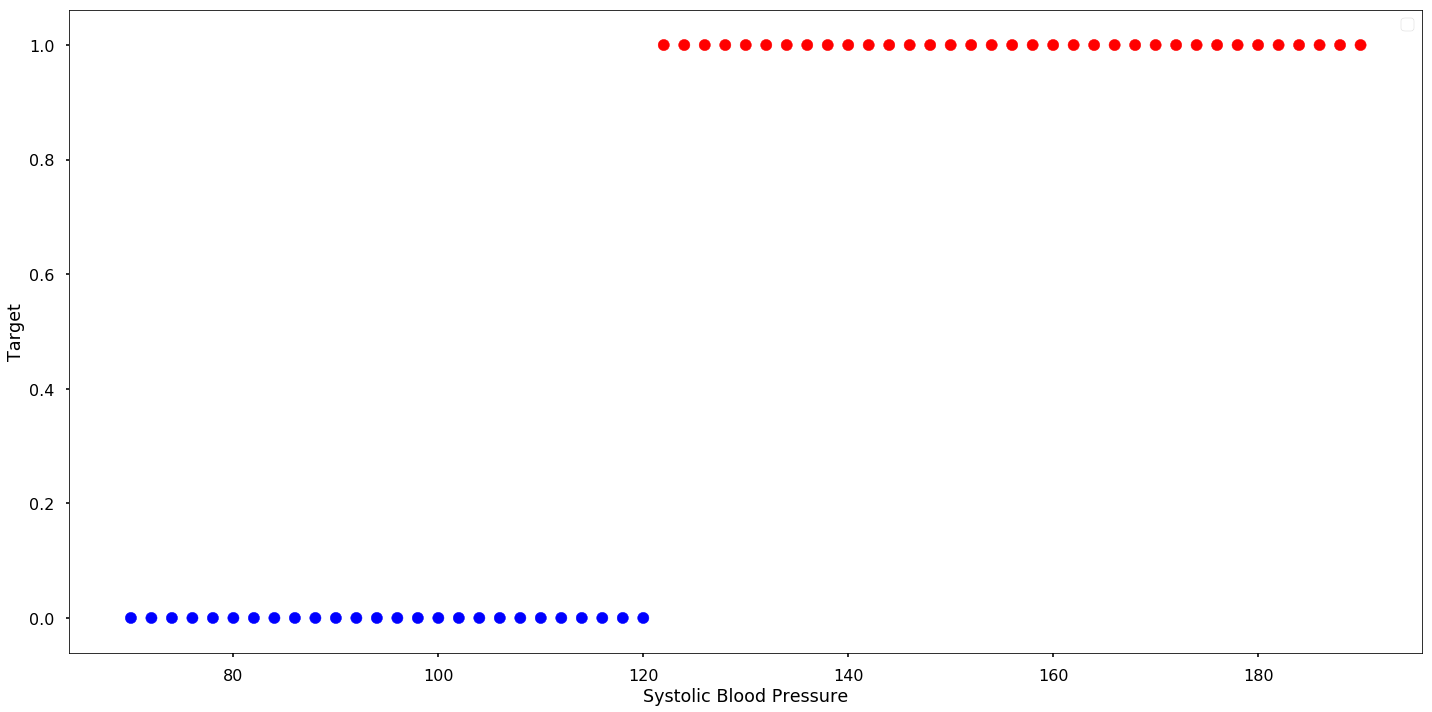

In [5]:
from matplotlib.colors import ListedColormap

colors = ["blue", "red"]
cmap = ListedColormap(colors[:len(np.unique(y))])
f = plt.figure(figsize=(20, 10))
ax = f.add_subplot(111)
ax.scatter(x, y, c=y, cmap=cmap)
ax.legend()
ax.set_ylabel("Target")
ax.set_xlabel("Systolic Blood Pressure")
f.tight_layout()
plt.show()

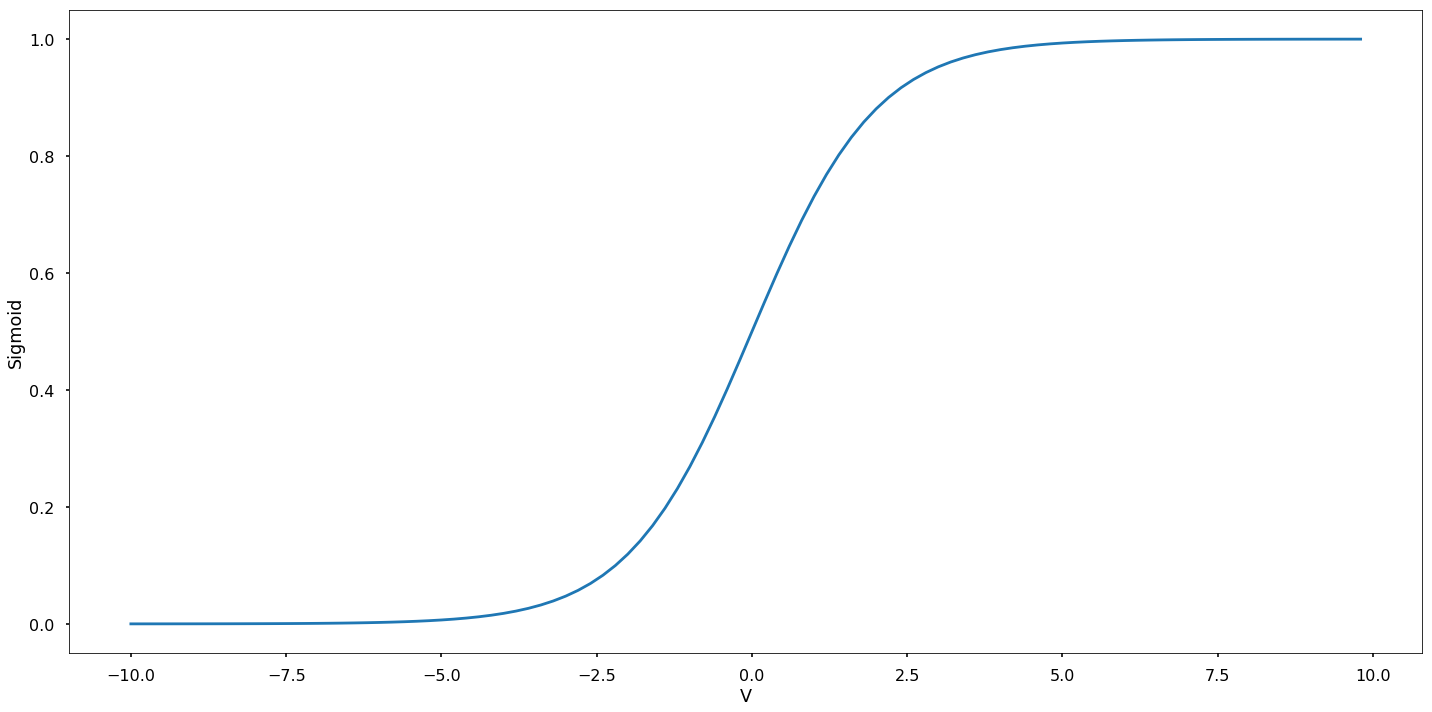

In [6]:
def sigmoid(v):
    return 1/(1+np.exp(-v))

v = np.arange(-10, 10, .2)
sig_v = sigmoid(v)    

f = plt.figure(figsize=(20, 10))
plt.plot(v, sig_v)
plt.xlabel("V",)
plt.ylabel("Sigmoid")
plt.tight_layout()


**Linear Regression to Logistic Regression:**

To simplify, Logistic regressions = Linear Regression + Sigmoid. Using sigmoid function we can convert the regression values to be between $[0, 1]$ and interpret them as probabilities.



Simple Linear Regression Equation: 

$$y_{regression} = mx +c $$

Where,

* $y_{regression}$ is the predicted value.

* $c$ is the bias or intercept term 

* $m$ is the coefficient for $x$


Logistic Regression equation:

$$y_{classification} = \frac{1}{1 + e^{-(m x + c)}}$$

Where,

* $y_{classification}$ is the predicted probability $[0, 1]$

* $c$ is the bias or intercept term 

* $m$ is the coefficient for $x$

In linear regression we fit a line $y=mx+c$, where as in logistic regression we fit $y = \sigma(mx+c)$. Here, $m$ and $c$ control the shape and position of the sigmoid curve. The effect of $m$ and $c$ is like stretching the sigmoid curve

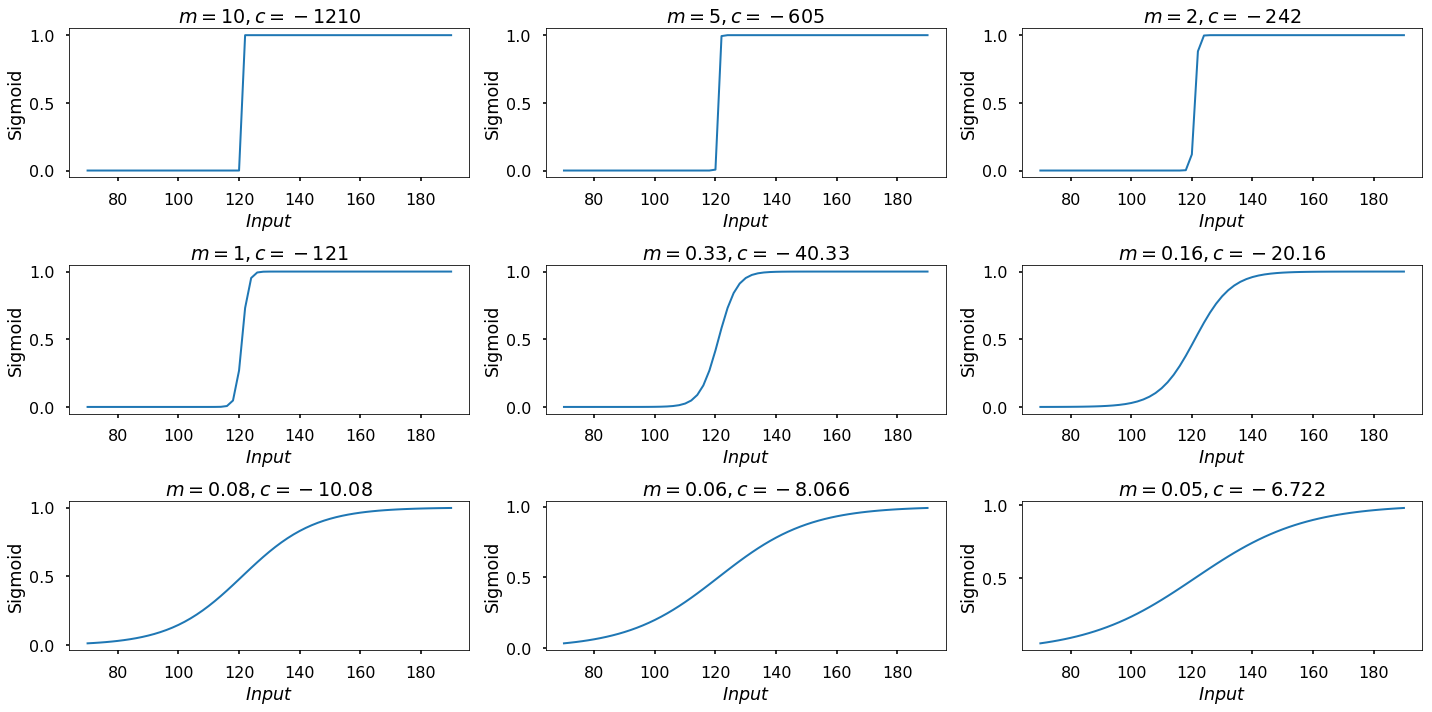

In [7]:
fig = plt.figure(figsize=(20, 10))

def plot_sigmoid(x, ms, cs, n):
    
    for i in range(len(ms)):
        ax = fig.add_subplot(np.ceil(np.sqrt(n)), np.round(np.sqrt(n)), i+1)
        ax.plot(x, sigmoid( ms[i]*x + cs[i]), linewidth=2)
        ax.set_xlabel("$Input$")
        ax.set_ylabel("Sigmoid")
        ax.set_title("$m=%0.4s, c=%0.6s$"%(ms[i], cs[i]))
    fig.tight_layout()
    plt.show()
    
ms = [10, 5, 2, 1, 1/3, 1/6, 1/12, 1/15, 1/18] 
cs = [-1210, 5*-121, -242, -121, -121/3, -121/6, -121/12, -121/15, -121/18]
plot_sigmoid(x, ms, cs, len(ms))

Here is the illustration of logistic regression curve fitting.

### Threshold

Let's assume the below shown curve is our final curve. With this curve, we have probabilty associated with each data point, where `y` axis indicates the value of probability that a particular data point belongs to "high" class. As we can see, the blue triangles are of class "Not High" and the red circles are of "High" class. The bottom (or top) part of the sigmoid curve, indicates the curve is confident that the points lying on that part of curve has close to $0$ (or $1$) probability of belonging to class "High". However, the transistion of curve from close to $0$ to $1$, is the uncertain area of the curve, which denotes the probability of the data point belonging to "High" class is increasing. 

![](../images/threshold0.jpg)

Let's say, we choose a threshold value of $0.3$, below which any data point would be classified as "Not High" class. This is indicated by green dotted line. Corresponding to the threshold value of $0.3$, the black dotted line indicates the linear classification boundary. As we can see, at this threshold we have classified all the "High" class data points, but also we have incorrectly classifed a "Not High" class as "High" class (denoted by black triangle)

![](../images/threshold1.jpg)

To compensate to this misclassification, if we move our threshold more towards $1$, let's say, $0.87$. we have classified all the "Not High" class data points, but also we have incorrectly classifed $2$ "High" class as "Not High" class (denoted by black triangle)


![](../images/threshold3.jpg)

In this case, if we set our threshold to $0.5$,  we correctly classify all the data points. Shortly we will use `sklearn.linear_model` module's `LogisticRegression` class to model logistic regression. By default, `LogisticRegression` has threshold of $0.5$ and this is configurable.

![](../images/threshold4.jpg)

Since this is a linearly separable data, we obtained the boundary which can correctly split the data. This is not usually the case. We often encounter datasets which are not linearly separable. In those cases, usually we stick to the threshold which has a balanced distribution among all the classes. Having said that, choosing the threshold value depends on the problem we are solving. For example, if the problem was to detect a disease and there is a considerable overlap of classes in the uncertain region, then its preferable to have a low threshold, to include all the patients with disease and treat them.


**Summary:**

The outcome of a logistic regression model is a probability. For binary classification, 

Does this patient has High B.P or not? We can do this using a threshold value $t$

* If probability from logistic model is  $\ge t$, then predict "High".
* If probability from logistic model is  $\lt t$, then predict "Not High".


**What value should we pick for $t$?**

The threshold value is often selected based on which errors are “better”

* If $t$ is large, predict "High" rarely. More errors where we say "Not High", but it is actually "High" class.

* If $t$ is small, predict "Not High" rarely. More errors where we say "High", but it is actually "Not High"



### Build a model

Let's import `sklearn.linear_model` module's `LogisticRegression` class.

In [9]:
from sklearn.linear_model import LogisticRegression

lm = LogisticRegression(penalty="l1") # use L1 regularization

Note: We will use a penalty called L1 regularization. Regularization is a technique to overcome overfitting of data. We will discuss regularization in detail. For now, let's use it as it makes the sigmoid curve easy to be interpreted.


The `fit` method expects `x` to be a 2 dimensional array $(n\_observations \times n\_features)$. We can add a new dimension to `x` using special slicing (`None`)

In [10]:
print("Shape of X: ", x.shape)
print("Dimension of X: ", x.ndim)
print(x[:5])

Shape of X:  (61,)
Dimension of X:  1
[70 72 74 76 78]


In [11]:
print("Shape of X: ", x[:, None].shape)
print("Dimension of X: ", x[:, None].ndim)
print(x[:, None][:5])

Shape of X:  (61, 1)
Dimension of X:  2
[[70]
 [72]
 [74]
 [76]
 [78]]


In [12]:
lm.fit(x[:, None], y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Let's get the predictions on `x`.

In [13]:
y_pred = lm.predict(x[:, None])

This is the curve our model has come up with. The `lm.coef_` and `lm.intercept_` are $m$ and $c$ of the logistic regression model.

List of m =  [[0.07900525]]
c =  [-9.38371221]


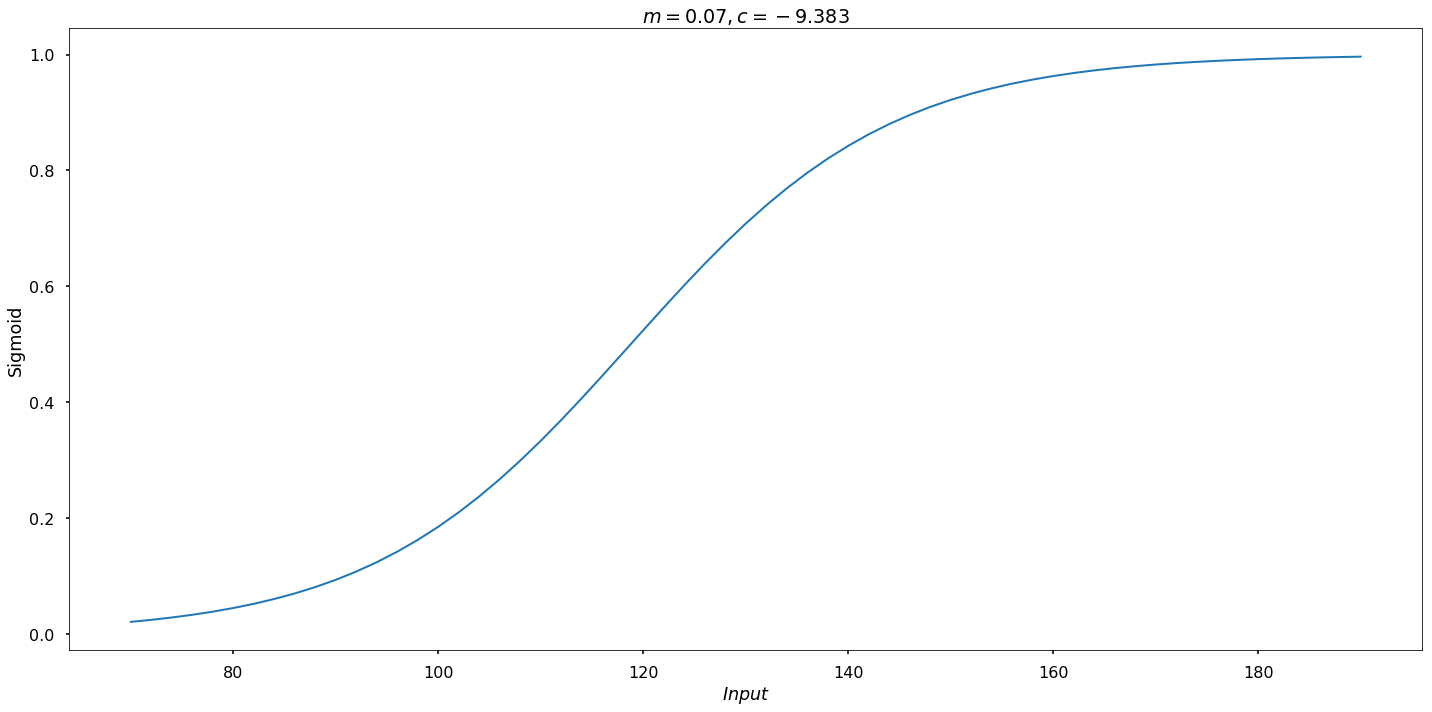

In [14]:
print("List of m = ", lm.coef_)
print("c = ", lm.intercept_)

fig = plt.figure(figsize=(20, 10))
plot_sigmoid(x, lm.coef_[0], lm.intercept_, 1)

`LogisticRegression` uses $0.5$ as threshold, by default. Let's calculate the accuracy score.

In [15]:
from sklearn.metrics import accuracy_score

accuracy_score(y, y_pred)

0.9836065573770492

We have an accuracy of $98.36%$, but we know the data is linearly separable and hence accuracy can improved to $1.0$! Let's obtain probabilities and try changing threshold to improve our accuracy. To fetch the probabilities we can use `predict_proba` method.

In [16]:
probs = lm.predict_proba(x[:, None])

In [17]:
probs[:5]

array([[0.97923179, 0.02076821],
       [0.97576288, 0.02423712],
       [0.97173129, 0.02826871],
       [0.96705173, 0.03294827],
       [0.96162812, 0.03837188]])

The `probs` numpy array has two dimensions. The first dimension is the probability that the data point belongs to class "Not High" (class represented by $0$) and the second dimension is the probability that the data point belongs to class "High" class. Let's choose the first dimension.

In [18]:
probs[:, 1]

array([0.02076821, 0.02423712, 0.02826871, 0.03294827, 0.03837188,
       0.04464706, 0.05189308, 0.06024094, 0.06983278, 0.08082053,
       0.09336361, 0.1076254 , 0.12376835, 0.14194746, 0.16230213,
       0.18494647, 0.20995828, 0.23736756, 0.26714508, 0.29919264,
       0.33333606, 0.3693225 , 0.40682318, 0.44544223, 0.48473152,
       0.52421045, 0.5633891 , 0.60179229, 0.63898214, 0.67457692,
       0.70826451, 0.73980987, 0.76905645, 0.79592243, 0.82039296,
       0.84250987, 0.86236022, 0.88006476, 0.89576723, 0.90962498,
       0.92180118, 0.9324587 , 0.9417555 , 0.94984147, 0.95685631,
       0.96292839, 0.9681743 , 0.97269892, 0.97659584, 0.97994798,
       0.98282844, 0.98530133, 0.98742266, 0.98924117, 0.9907992 ,
       0.99213341, 0.99327545, 0.99425266, 0.99508856, 0.9958034 ,
       0.99641457])

Let's verify the accuracy for default threshold $(0.5)$.

In [19]:
probs[:, 1] > 0.5 # check if probs is greater than threshold

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [20]:
y_pred = (probs[:, 1] > 0.5).astype(np.int) # convert binary values to integers 0 or 1
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

The accuracy score does match with the one with the default predictions.

In [21]:
accuracy_score(y, y_pred)

0.9836065573770492

Let's decrease the threshold to $0.4$ and see how accuracy score changes.

In [22]:
y_pred = (probs[:, 1] > 0.4).astype(np.int)
accuracy_score(y, y_pred)

0.9344262295081968

Let's increase the threshold to $0.8$.

In [23]:
y_pred = (probs[:, 1] > 0.8).astype(np.int)
accuracy_score(y, y_pred)

0.8688524590163934

Let's plot the threshold vs accuracy, for threshold values from $0$ and $1$.

In [24]:
thresholds = np.arange(0, 1, 0.05)
accuracies = []
for t in thresholds:
    y_pred = (probs[:, 1] > t).astype(np.int)
    accuracies.append(accuracy_score(y, y_pred))

Text(0,0.5,'Accuracy')

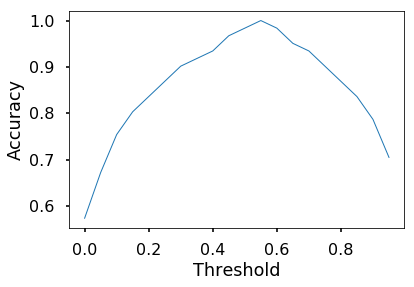

In [25]:
plt.plot(thresholds, accuracies, linewidth=1)
plt.xlabel("Threshold")
plt.ylabel("Accuracy")

From the plot, we can see that the accuracy has reached $1.0$. Let's get the index of `accuracies` which has highest accuracy score

In [26]:
max_accuracy_idx = np.argmax(accuracies) # argmax fetches the index of the list with the highest value
print(max_accuracy_idx)

11


Let's fetch the threshold for which accuracy is maximum

In [27]:
threshold = thresholds[max_accuracy_idx]
print(threshold)

0.55


Let's verify the accuracy.

In [28]:
y_pred = (probs[:, 1] > 0.55).astype(np.int)
accuracy_score(y, y_pred)

1.0